# Training

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
%run lib2 --area_id=4 --bs=64 --num_workers=8 --num_slice=9 --gpu_start=4 --num_gpus=2

In [3]:
trn_csv = pd.read_csv(PATH/DATA_PATH/FMT_VALTRAIN_FN)
val_csv = pd.read_csv(PATH/DATA_PATH/FMT_VALTEST_FN)
trn_image_ids = trn_csv['ImageId'].tolist()
val_image_ids = val_csv['ImageId'].tolist()

trn_y = load_y(trn_image_ids, FMT_VALTRAIN_MASK_STORE)
val_y = load_y(val_image_ids, FMT_VALTEST_MASK_STORE)

trn_names = [str(o) + '.png' for o in trn_image_ids]
val_names = [str(o) + '.png' for o in val_image_ids]

In [4]:
stats = get_rgb_mean_stat(area_id)
aug_tfms = transforms_top_down
for o in aug_tfms: o.tfm_y = TfmType.CLASS
tfms = tfms_from_stats(stats, sz, crop_type=CropType.NO, tfm_y=TfmType.CLASS, aug_tfms=aug_tfms)
# empty = ['empty'] * 2
trn = (trn_names, trn_y)
val = (val_names, val_y)
test = None
datasets = ImageData.get_ds(OptionalFilesArrayDataset, trn, val, tfms,
                            test=test, path=PATH/DATA_PATH/TRN, num_slice=num_slice, pad=False)
md = ImageData(str(PATH), datasets, bs, num_workers=num_workers, classes=None)
denorm = md.trn_ds.denorm

In [5]:
model = get_model()

In [6]:
learn = get_learn(md, model, load_weight=True)

 90%|████████▉ | 405/451 [07:00<00:47,  1.04s/it, loss=5.04]

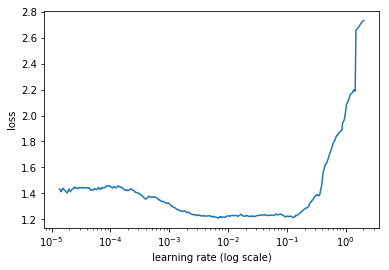

In [8]:
learn.lr_find()
learn.sched.plot()

In [7]:
lr=4e-2
wd=1e-7
lrs = np.array([lr/3,lr])

In [ ]:
learn.fit(lr,1, wds=wd, cycle_len=4, use_wd_sched=True, use_clr=(20,8), best_save_name=weight_load)

  0%|          | 0/451 [00:00<?, ?it/s]                     


Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



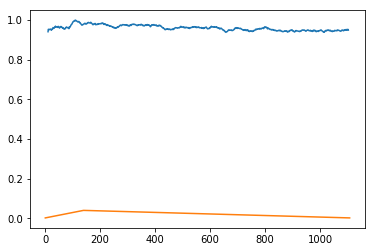

In [28]:
learn.save('unet-shanghai')

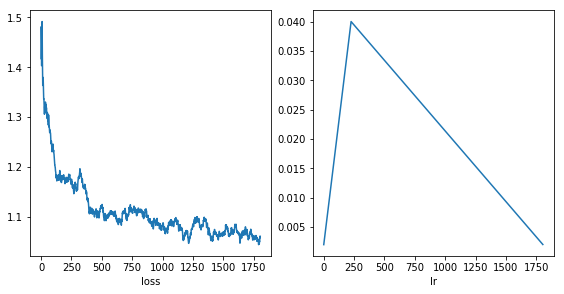

In [11]:
plot_lr_loss(learn)

In [8]:
lrs /= 4

In [9]:
learn.fit(lrs,1, wds=wd, cycle_len=8,use_clr=(20,8), best_save_name=weight_load)

epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      1.053063   1.018635   0.901495   0.470879  
    1      1.056985   1.012753   0.910824   0.46733         
    2      1.055803   1.004591   0.910143   0.470508        
    3      1.051649   1.002744   0.908996   0.471896        
    4      1.049372   1.017487   0.898857   0.472204        
    5      1.031697   1.010862   0.900704   0.474545        
    6      1.032225   0.996521   0.907267   0.475081        
    7      1.022863   0.998056   0.90548    0.476387        



[array([0.99806]), 0.9054799533227478, 0.4763874468995803]

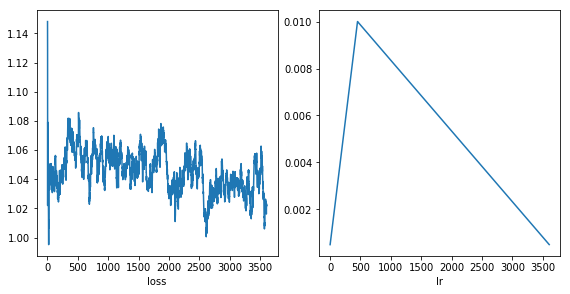

In [10]:
plot_lr_loss(learn)

In [12]:
lrs /= 4

In [13]:
learn.fit(lrs,1, wds=wd, cycle_len=8, use_wd_sched=True, use_clr=(20,8), best_save_name=weight_load)

epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      1.026829   0.993957   0.91027    0.474521  
    1      1.030339   1.002224   0.903031   0.474806        
    2      1.041223   0.991999   0.90964    0.475396        
    3      1.021714   0.988806   0.911539   0.47587         
    4      1.036266   1.002116   0.902812   0.475826        
    5      1.008263   0.989259   0.909178   0.478074        
    6      1.022803   0.991046   0.907726   0.477913        
    7      1.017012   0.992067   0.906886   0.477968        



[array([0.99207]), 0.9068856423021567, 0.47796805104595097]

In [14]:
learn.save('shanghai.final')

In [15]:
learn.fit(lrs,1, wds=wd, cycle_len=8, use_wd_sched=True, use_clr=(20,8), best_save_name=weight_load)

epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      1.030922   1.009688   0.900167   0.475516  
    1      1.027007   0.995682   0.904783   0.477236        
    2      1.034138   0.993312   0.90723    0.478132        
    3      1.022796   0.993367   0.907308   0.477335        
    4      1.027741   0.997571   0.902526   0.477692        
    5      1.02027    0.988523   0.906716   0.479112        
    6      1.007799   0.99547    0.903526   0.478279         
    7      1.006027   0.986856   0.907378   0.47955          



[array([0.98686]), 0.9073777164160604, 0.4795503847835529]

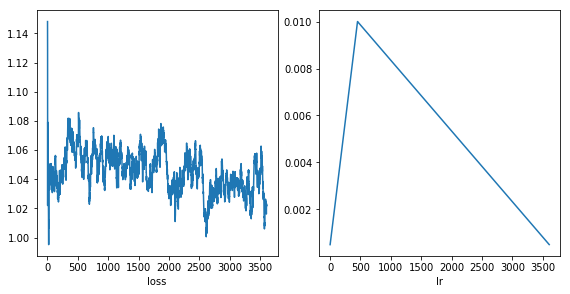

In [10]:
plot_lr_loss(learn)